In [19]:
# MAE mean loss , our motive is to reduce the value,
### Advantage
# measure in terms of y variable
# It can robust throgh outlier
## Distadvantage
#  since it is a modulus function its not differentiable at zero, 
# optimization technique like gradient decent cannot be overcome
### MSE (Mean Square Error)
# Avantage
# Can be uesd as loss function and differentiable
## Disadvatage
# magnitude of square
# no robust to outlier
### RMSE (Root Mean square Error)
# Advantage is same unit as input variable
# Disadvantage is not robust without lier
### R2 score or godness of fit or determination of fit ( compare linear reg line and mean line)
## r2 score = (1 - ssr(reg line)/ssm(mean line))
# r2 = 0 if rer line = mean line
# r2 = 1 if reg line is passing throgh all points
## r2 <0 if ssr/ssm > 0 if regression line is worst than mean line or incase of non linear relation
# if r2 = 80 then x variable can explain 80% of variance of y variable
#  prob: with increase of input variable r2 score increase but its also sensitive towars releavant input
#### Adjusted r2 score (r2 = 1 - (1 -r2)(n-1)/(n-1-k)) n: no of rows, k: total no of independent columns
# if r2 and adj r2 are different its better to go with adj r2 score


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('placement1.csv')

Text(0, 0.5, 'Package(in lpa)')

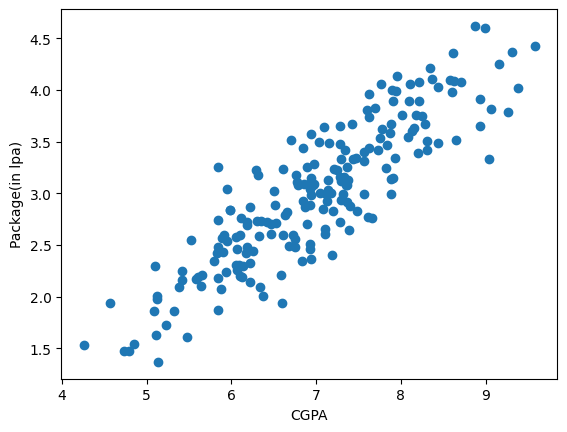

In [6]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [7]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package(in lpa)')

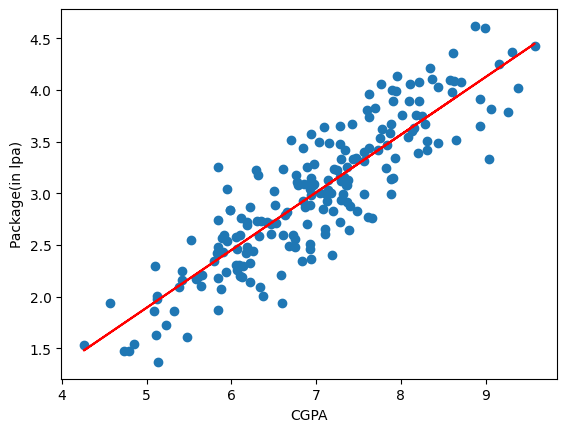

In [12]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [21]:
y_pred = lr.predict(X_test)

In [22]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 0.2884710931878175


In [ ]:
print("MSE",mean_squared_error(y_test,y_pred))

In [23]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.34827051717731616


In [41]:
print("R2_Score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2_Score 0.7811919132590539


In [30]:
# Adjusted R2 score
print(X_test.shape)
print("adj r2 valve is", 1 - ((1-r2)*(40-1)/(40-1-1)))

(40, 1)
adj r2 valve is 0.7749598882343415


In [31]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.989605,3.26
1,5.12,0.202920,1.98
2,7.82,0.057382,3.25
3,7.42,0.605139,3.67
4,6.94,0.917671,3.57


Text(0, 0.5, 'Package(in lpa)')

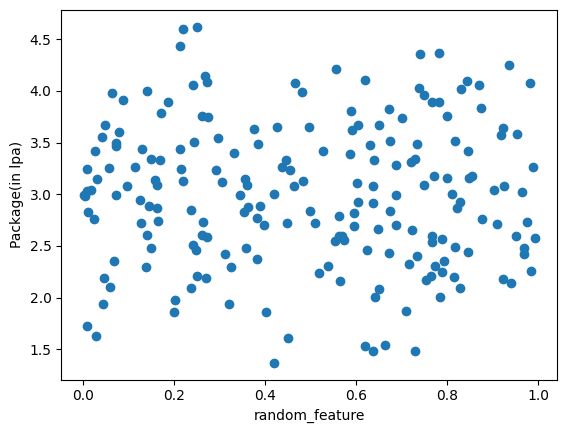

In [32]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [33]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(X_test)

In [38]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7811919132590539


In [40]:
print("Adj R2_score:", 1 - ((1-r2)*(40-1)/(40-1-2)))

Adj R2_score: 0.7693644491108946
